In [9]:
import sys
sys.path.append('../../../')
import helper

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import inspect

In [10]:
def f(x, w):
    return (1 - x * w[0]) ** 2 + 100 * (x * w[1] - x ** 2) ** 2

result_name = '3'
params_dataset = {
    "f_label": inspect.getsource(f),
    "density": 8000,
    "dots_count": 1000,
    "radius": 0.001,
    "dist": 0.01,
    "w0": 2,
    "w1": 3,
    "test_count": 10,
}

X = np.linspace(-params_dataset["dist"], params_dataset["dist"], params_dataset["density"])
Y = np.array([f(x, np.array([params_dataset["w0"], params_dataset["w1"]], dtype=float)) for x in X])

datasets = [0] * params_dataset["test_count"]

for k in tqdm(range(params_dataset["test_count"])):
    datasets[k] = helper.generate_full_dataset(X, Y, params_dataset["dots_count"], params_dataset["radius"])


100%|██████████| 10/10 [00:21<00:00,  2.15s/it]


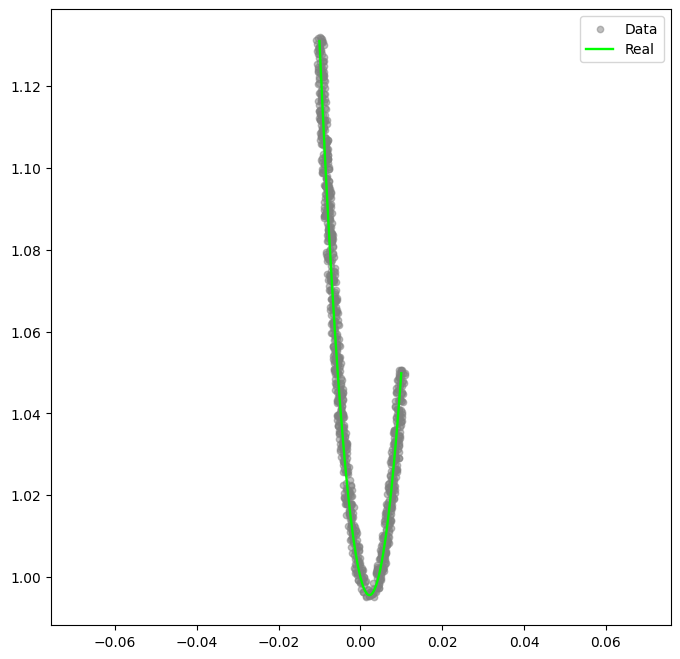

In [11]:
helper.print_generated(X, Y, datasets[0])

In [12]:
helper.save_datasets(X, Y, datasets, 'temp')
helper.add_dataset(result_name, params_dataset, 'temp')